<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-Introduction" data-toc-modified-id="Notebook-Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook Introduction</a></span></li><li><span><a href="#Import-the-libraries" data-toc-modified-id="Import-the-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import the libraries</a></span></li><li><span><a href="#Read-in-the-datasets" data-toc-modified-id="Read-in-the-datasets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read in the datasets</a></span><ul class="toc-item"><li><span><a href="#Solar-/-Wind-power-generation" data-toc-modified-id="Solar-/-Wind-power-generation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Solar / Wind power generation</a></span><ul class="toc-item"><li><span><a href="#Quick-Exploration" data-toc-modified-id="Quick-Exploration-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Quick Exploration</a></span></li><li><span><a href="#Extracting-the-relevant-columns" data-toc-modified-id="Extracting-the-relevant-columns-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Extracting the relevant columns</a></span></li><li><span><a href="#Renaming-and-Updating-columns" data-toc-modified-id="Renaming-and-Updating-columns-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Renaming and Updating columns</a></span></li><li><span><a href="#High-level-Missing-Data" data-toc-modified-id="High-level-Missing-Data-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>High level Missing Data</a></span></li><li><span><a href="#Saving-the-output" data-toc-modified-id="Saving-the-output-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Saving the output</a></span></li></ul></li><li><span><a href="#Weather-Data" data-toc-modified-id="Weather-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Weather Data</a></span><ul class="toc-item"><li><span><a href="#Quick-Exploration" data-toc-modified-id="Quick-Exploration-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Quick Exploration</a></span></li><li><span><a href="#Extracting-the-relevant-columns" data-toc-modified-id="Extracting-the-relevant-columns-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Extracting the relevant columns</a></span></li><li><span><a href="#Renaming-and-Updating-columns" data-toc-modified-id="Renaming-and-Updating-columns-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Renaming and Updating columns</a></span></li><li><span><a href="#High-level-Missing-Data" data-toc-modified-id="High-level-Missing-Data-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>High level Missing Data</a></span></li><li><span><a href="#Saving-the-output" data-toc-modified-id="Saving-the-output-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Saving the output</a></span></li></ul></li></ul></li></ul></div>

# Energy Analysis Project - Notebook 1 : Data Collection / Wrangling

**@Author: Stratos Hadjioannou**

**June 2020**

This project will go through the entire data science pipeline by analysing the Energy consumption of various European countries. Most of the data was obtained from the [Open Power System Data](https://open-power-system-data.org/) website with the exception of the sunset and sunrise dataset that is taken from [this website.](https://www.timeanddate.com/sun/). This project has been inspired by a workshop I attended in the conference virtual DSGO that analysed this data to demonstrate the use of MLflow. You can find out more about this project in [this repo.](https://github.com/Samreay/DSGoPipeline) This project also uses Cookiecutter for file structure. You can find more about it in [this article.](https://medium.com/@rrfd/cookiecutter-data-science-organize-your-projects-atom-and-jupyter-2be7862f487e)

![energy_image](https://795d665f9fc7b1053e24-4d632937b8453c17306cf8bcb974f77f.ssl.cf3.rackcdn.com/x/1330cm500/images/Sectors/Sustainable_energy/sector-banner_sustainable-energy-banner-fisher-german.jpg)

This project will combine various open-source datasets that relate top power generation of various European countries. It will go through the entire data science project outlined below: 

1. Data Collection / Wrangling
2. Data Manipulation / Cleanning
3. Exploratory Data Analysis (EDA)
4. Modelling / Validation
5. Deployment of Model

The aim of this project is to learn what affect the energy generation of these countries. The full code for this project can be found here.

## Notebook Introduction

This notebook will focus on data collection and wrangling. This is the process of collecting all the data you will need for your project and transforms it into a usable form. Most of the times data that you can find is in a form that is hard to be analyzed, this part will look at different ways to transform this data and make it usable for the rest of the project.

The data sources we will use in this project are:

- Solar / Wind power generation
- Historic weather data
- Energy capacity across different countries
- Sunset / Sunrise data

## Import the libraries

This section imports the libraries needed for this project.

In [40]:
# general python libraries
import os
from datetime import datetime

# data manipulation
import numpy as np
import pandas as pd
import missingno as msno
%matplotlib inline

# import the .src file for custom functions
# this requires that you run the following command
# pip install --editable .
import src

# define the paths
raw_data_path = "../data/raw"

## Read in the datasets
This section will read the various datasets used in this project.

### Solar / Wind power generation
As mentioned in the introduction of this notebook the data for this is taken directly from [this website](https://data.open-power-system-data.org/time_series/). From the website, this data includes Load, wind and solar, prices in hourly resolution for various European countries. We use *Version 2019-06-05*.

To start with we will get only the data from Germany (DE), France (FR), Denmark (DK), United Kingdom (UK) and Switzerland (CH) as we also have data for renewable plans on those countries.

In [2]:
# read the data from the direct link
df_energy = pd.read_csv("https://data.open-power-system-data.org/time_series/2019-06-05/time_series_60min_singleindex.csv",
                        parse_dates=[0], index_col=0)
# display the data
df_energy.head()

,cet_cest_timestamp,AL_load_actual_entsoe_power_statistics,AT_load_actual_entsoe_power_statistics,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BA_load_actual_entsoe_power_statistics,BE_load_actual_entsoe_power_statistics,...,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,TR_load_actual_entsoe_power_statistics,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency,UA_east_load_actual_entsoe_transparency,UA_east_load_forecast_entsoe_transparency,UA_west_load_actual_entsoe_power_statistics,UA_west_load_actual_entsoe_transparency,UA_west_load_forecast_entsoe_transparency
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2004-12-31 23:00:00+00:00,2005-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 00:00:00+00:00,2005-01-01T01:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:00:00+00:00,2005-01-01T02:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 02:00:00+00:00,2005-01-01T03:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 03:00:00+00:00,2005-01-01T04:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Quick Exploration
Let's get some quick information on the dataset. We define a function that we can use later on as we will be dealing primarily with Time series data.

In [51]:
def get_ts_data_details(df_ts):
    """
    Takes in a time series
    dataset and returns some
    general information
    
    - Col and Row number 
    - Date Range
    
    """
    
    # check whether we have a datetime index
    if pd.api.types.is_datetime64_ns_dtype(df_ts.index):
        
        # get the max and min date
        min_date = df_ts.index.min().date()
        max_date = df_ts.index.max().date()
        
        # print the shape of the dataset and the range
        print(f"There are {df_ts.shape[0]} rows and {df_ts.shape[1]} columns in this dataset.")
        print(f"The data ranges from {min_date} to {max_date}")

    else:
        print("Please use a dataframe with datetime index.")
        
    return

get_ts_data_details(df_ts = df_energy)

There are 125593 rows and 392 columns in this dataset.
The data ranges from 2004-12-31 to 2019-04-30


As we can see we have plenty of data (about 125K rows) with various columns that represent the different countries. The data covers approximately 15 years of hourly intervals.

In [4]:
# get a quick summary of all columns
df_energy.describe(include="all")

,cet_cest_timestamp,AL_load_actual_entsoe_power_statistics,AT_load_actual_entsoe_power_statistics,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BA_load_actual_entsoe_power_statistics,BE_load_actual_entsoe_power_statistics,...,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,TR_load_actual_entsoe_power_statistics,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency,UA_east_load_actual_entsoe_transparency,UA_east_load_forecast_entsoe_transparency,UA_west_load_actual_entsoe_power_statistics,UA_west_load_actual_entsoe_transparency,UA_west_load_forecast_entsoe_transparency
count,125593,17518.000000,113950.000000,38665.000000,38449.000000,33382.000000,37932.000000,81769.000000,116109.000000,114694.000000,...,37991.000000,37862.000000,27717.000000,13755.000000,13680.000000,13755.000000,13680.000000,87646.000000,13777.000000,13680.000000
unique,125593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2007-07-30T23:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,814.032674,7439.772927,7136.933144,7171.877656,33.830358,122.458847,483.028495,1383.391691,9893.606287,...,3329.889000,58.121923,32643.938415,18065.648964,18042.944006,17381.150382,17503.826462,630.408821,684.516295,539.117544
std,NaN,210.328043,1567.314065,1401.611692,1361.348203,14.962952,180.087957,538.138292,257.984817,1460.356651,...,442.552904,90.382244,4954.713689,2758.624636,2785.547927,2627.874358,2702.312421,145.146332,162.615694,83.235973
min,NaN,407.910000,3622.000000,664.000000,3739.000000,-76.000000,0.000000,-1.000000,796.000000,5973.000000,...,2210.000000,0.000000,17796.480000,11944.000000,12060.000000,11692.000000,11700.000000,43.000000,81.000000,360.000000
25%,NaN,630.000000,6239.000000,6014.000000,6087.000000,25.000000,0.000000,97.000000,1179.000000,8744.000000,...,2990.000000,0.000000,28679.510000,16169.500000,16184.000000,15567.000000,15700.000000,525.000000,577.000000,484.000000
50%,NaN,830.885000,7328.000000,7106.000000,7158.000000,33.000000,14.000000,281.000000,1408.000000,9930.000000,...,3340.000000,2.400000,32891.800000,17732.000000,17730.000000,17059.000000,17200.000000,611.000000,688.000000,530.000000
75%,NaN,949.157500,8626.000000,8148.000000,8154.000000,42.000000,202.000000,673.000000,1562.000000,10989.000000,...,3640.000000,90.775000,36105.210000,20275.000000,20253.000000,19484.000000,19648.000000,727.000000,799.000000,605.000000


From the above we can see that quite a few columns have missing data. We will explore this more in the next section but first we will get only the data we are interested in.

#### Extracting the relevant columns
This section will extract the columns for only the countries of interest. We are also interested only on the total Load, Solar and Wind generation. For all other fields please check the full list of columns on the [Open Power System Data](https://data.open-power-system-data.org/time_series/) website.

In [5]:
df_energy.head()

,cet_cest_timestamp,AL_load_actual_entsoe_power_statistics,AT_load_actual_entsoe_power_statistics,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BA_load_actual_entsoe_power_statistics,BE_load_actual_entsoe_power_statistics,...,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,TR_load_actual_entsoe_power_statistics,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency,UA_east_load_actual_entsoe_transparency,UA_east_load_forecast_entsoe_transparency,UA_west_load_actual_entsoe_power_statistics,UA_west_load_actual_entsoe_transparency,UA_west_load_forecast_entsoe_transparency
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2004-12-31 23:00:00+00:00,2005-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 00:00:00+00:00,2005-01-01T01:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:00:00+00:00,2005-01-01T02:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 02:00:00+00:00,2005-01-01T03:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 03:00:00+00:00,2005-01-01T04:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# define the country codes and rel columns
country_codes = ['DE', 'FR', 'DK', 'UK', 'CH']

# get the load columns
load_cols = ["DE_load_actual_entsoe_power_statistics",
             "FR_load_actual_entsoe_power_statistics",
             "GB_UKM_load_actual_entsoe_power_statistics",
             "DK_load_actual_entsoe_power_statistics",
             "CH_wind_onshore_generation_actual"]

# get the solar generation columns
solar_cols = ["DE_solar_generation_actual",
              "FR_solar_generation_actual",
              "GB_UKM_solar_generation_actual",
              "CH_solar_generation_actual",
              "DK_solar_generation_actual"]

# get the wind generation columns
wind_cols = ["DE_wind_generation_actual",
             "FR_wind_onshore_generation_actual",
             "GB_UKM_wind_onshore_generation_actual",
             "GB_UKM_wind_offshore_generation_actual",
             "DK_wind_offshore_generation_actual",
             "DK_wind_onshore_generation_actual",
             "CH_wind_onshore_generation_actual"]

all_cols = load_cols + solar_cols + wind_cols

# extract the data
df_energy_rel = df_energy[all_cols].copy() 

#### Renaming and Updating columns
The next step is to rename some of the columns and combine others. As observed, for some countries we only have "onshore" wind energy. For those we will just assume that's the total wind generation we have. For others we have a column for both "onshore" and offshore, for those we will just combine them and assume that's the total energy.

In [36]:
# sum the columns that have both onshore and offshore
# the min_count ensures that at least one value is present
# otherwise it defaults to NaN
df_energy_rel['GB_UKM_wind_generation_actual'] = df_energy_rel[['GB_UKM_wind_offshore_generation_actual',
                                                                'GB_UKM_wind_onshore_generation_actual']].sum(min_count=1,
                                                                                                          axis=1)

df_energy_rel['DK_wind_generation_actual'] = df_energy_rel[['DK_wind_offshore_generation_actual',
                                                            'DK_wind_onshore_generation_actual']].sum(min_count=1,
                                                                                                      axis=1)

# drop the original columns
df_energy_rel = df_energy_rel.drop(["GB_UKM_wind_onshore_generation_actual",
                                    "GB_UKM_wind_offshore_generation_actual",
                                    "DK_wind_offshore_generation_actual",
                                    "DK_wind_onshore_generation_actual"], axis=1)

df_energy_rel = df_energy_rel.rename(columns={"FR_wind_onshore_generation_actual" : "FR_wind_generation_actual"})

# replace "GB_UKM" with just "UK"
df_energy_rel.columns = df_energy_rel.columns.str.replace("GB_UKM", "UK")

# create a list to rename the columns
renamed_cols = []

# Loop through the columns and make the replacements
for col in df_energy_rel.columns:
    
    if "wind" in col:
        renamed_cols.append(col.split("_")[0] + "_" + "wind")
    elif "solar" in col:
        renamed_cols.append(col.split("_")[0] + "_" + "solar")
    elif "load" in col:
        renamed_cols.append(col.split("_")[0] + "_" + "load")
    else:
        renamed_cols.append(col)
        
# add the new columns and present the result
df_energy_rel.columns = renamed_cols
df_energy_rel.head(5)

,DE_load,FR_load,UK_load,DK_load,CH_wind,DE_solar,FR_solar,UK_solar,CH_solar,DK_solar,DE_wind,FR_wind,CH_wind,UK_wind,DK_wind
utc_timestamp,,,,,,,,,,,,,,,
2004-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### High level Missing Data
This section will look at for "large" chunks of missing data (e.g more than 3 month) and deal with them. It won't deal with any imputing methods as this will be covered in the next notebook. For this we will use the [Missingno library](https://github.com/ResidentMario/missingno).

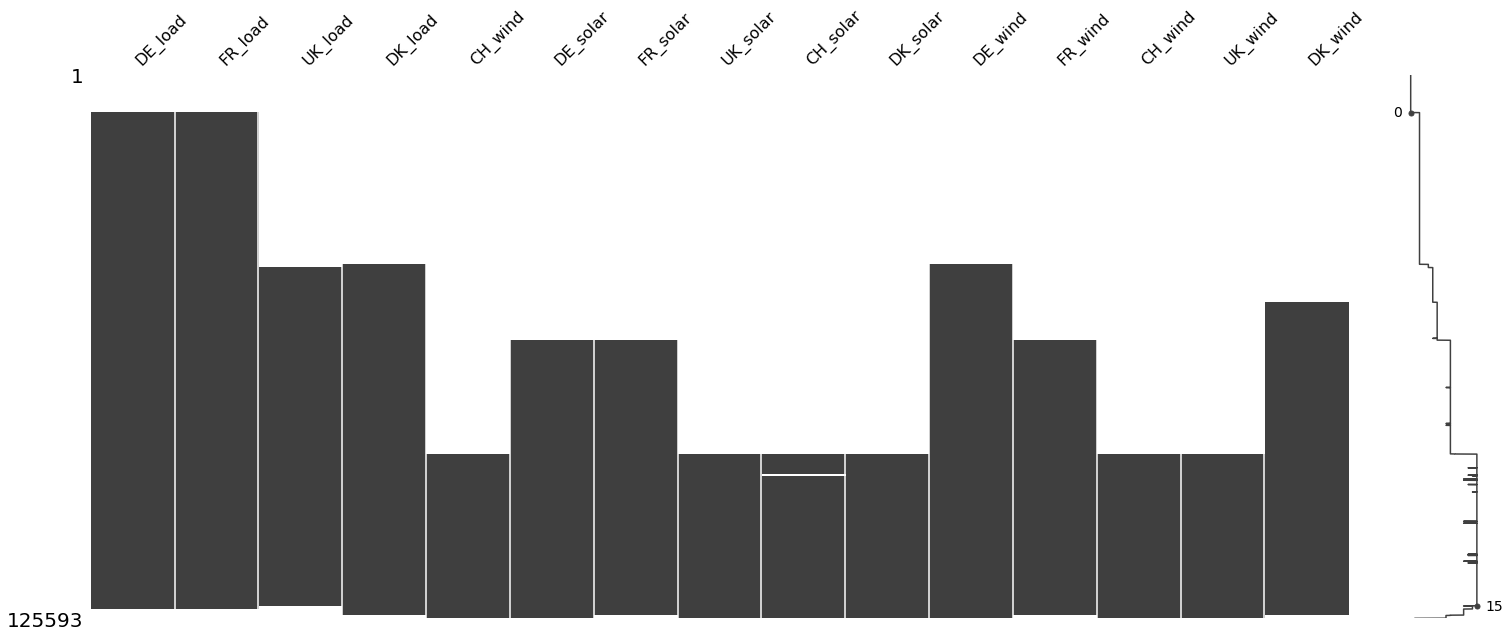

In [37]:
# create a missing data matrix
msno.matrix(df_energy_rel);

As we can see there are different levels of missing data depending on the country. For our study to be as meaningful as possible we need data from all three areas (Load, Wind and Solar). For that reason we will chose our "cutoff" point where the DE_solar and FR_solar columns start. This is because Solar is the column with the least data compared to the other three. Although other countries have less data (e.g. UK and CH) as we will be modelling these separately we will deal with that at a later stage. 

Total of 51.0% rows remain after dropping nulls for column DE_solar
There are 64190 rows and 15 columns in this data
The data ranges from 2012-01-01 to 2019-04-30


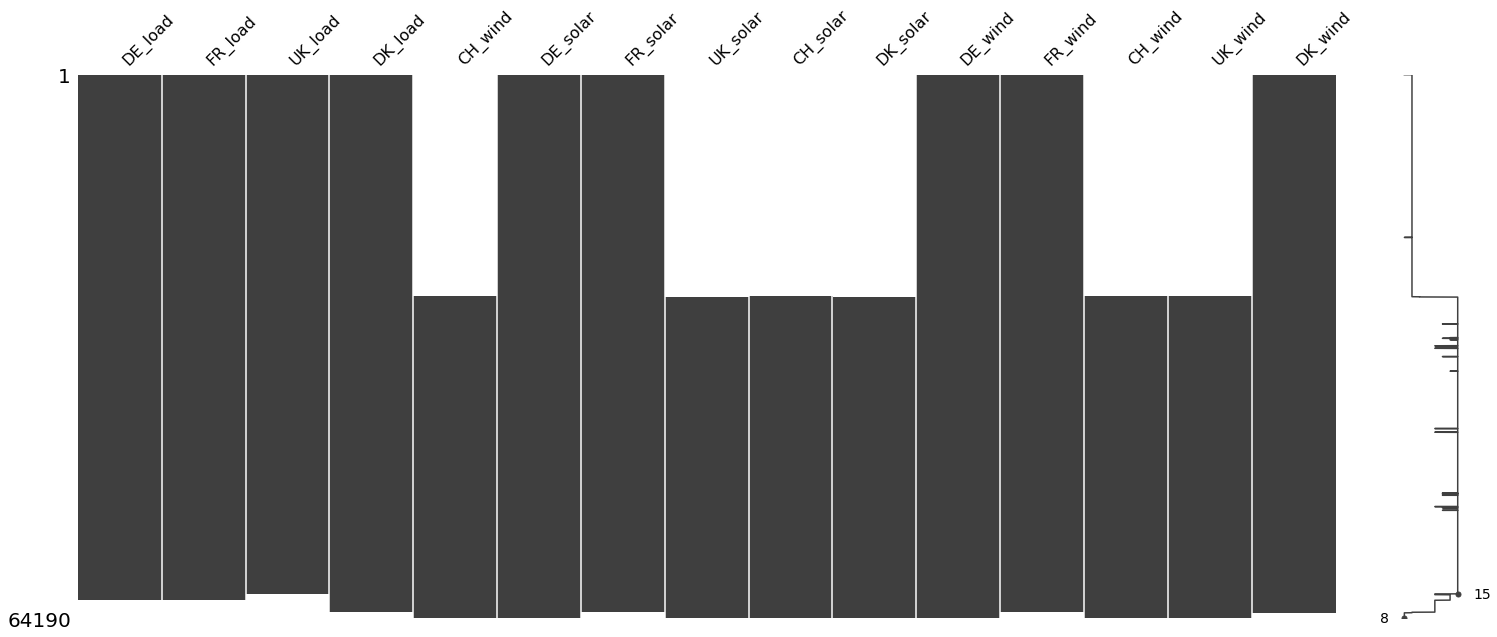

In [50]:
# # column to use as basis
# basis_drop_col = "DE_solar"
# rn_before = df_energy_rel.shape[0]

# # we wouldn't normally use this as it can drop values lower in the column
# # however as seen above there are no such values for DE_solar
# df_energy_rel = df_energy_rel.dropna(subset=[basis_drop_col], axis=0)
# rn_after = df_energy_rel.shape[0]
# perc_rem = round(rn_after / rn_before * 100,0)

# print new data stats
print(f"Total of {perc_rem}% rows remain after dropping nulls for column {basis_drop_col}.")
get_ts_data_details(df_ts=df_energy_rel)

# create the matrix again
msno.matrix(df_energy_rel);

We have retained only about 51% of our data which now ranges from 2012-2019.

In [39]:
# show the final data
df_energy_rel.head()

,DE_load,FR_load,UK_load,DK_load,CH_wind,DE_solar,FR_solar,UK_solar,CH_solar,DK_solar,DE_wind,FR_wind,CH_wind,UK_wind,DK_wind
utc_timestamp,,,,,,,,,,,,,,,
2012-01-01 07:00:00+00:00,36242.8571,46139.0,25534.4043,3153.0,NaN,80.0,NaN,NaN,NaN,NaN,9684.0,3608.0,NaN,NaN,2056.4
2012-01-01 08:00:00+00:00,38530.7692,47738.0,26417.7872,3285.0,NaN,414.0,77.0,NaN,NaN,NaN,10580.0,3518.0,NaN,NaN,1885.0
2012-01-01 09:00:00+00:00,41438.4615,49308.0,29067.2766,3485.0,NaN,854.0,266.0,NaN,NaN,NaN,10796.0,3580.0,NaN,NaN,1886.9
2012-01-01 10:00:00+00:00,44803.2967,51093.0,32743.9787,3645.0,NaN,1141.0,468.0,NaN,NaN,NaN,10497.0,3724.0,NaN,NaN,1913.4
2012-01-01 11:00:00+00:00,45465.9341,53715.0,35629.4681,3694.0,NaN,1321.0,592.0,NaN,NaN,NaN,9398.0,3834.0,NaN,NaN,1878.2


#### Saving the output

We are now happy to save our output data into the *raw* data folder of the project.

In [42]:
# save the output
output_path = os.path.join(raw_data_path, "power_data_raw.csv")
df_energy_rel.to_csv(output_path)

### Weather Data
For this project we will also use some weather information that you can also find on [Open Power System Data](https://data.open-power-system-data.org/weather_data/) website. The data has hour resolution for European countries. We are using *Version : 2019-04-09*

In [43]:
# read in the data directly from the link
df_weather = pd.read_csv("https://data.open-power-system-data.org/weather_data/2019-04-09/weather_data.csv", 
                         parse_dates=[0], index_col=0)

# print the head
df_weather.head()

,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,EE_temperature,EE_radiation_direct_horizontal,EE_radiation_diffuse_horizontal,ES_temperature,ES_radiation_direct_horizontal,ES_radiation_diffuse_horizontal,FI_temperature,...,LU_radiation_direct_horizontal,LU_radiation_diffuse_horizontal,NL_windspeed_10m,NL_temperature,NL_radiation_direct_horizontal,NL_radiation_diffuse_horizontal,PL_windspeed_10m,PL_temperature,PL_radiation_direct_horizontal,PL_radiation_diffuse_horizontal
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
1980-01-01 00:00:00+00:00,4.664,0.0,0.0,-7.060,0.0,0.0,8.066,0.0,0.0,-6.254,...,0.0,0.0,7.52,2.382,0.0,0.0,3.57,-3.721,0.0,0.0
1980-01-01 01:00:00+00:00,4.052,0.0,0.0,-7.341,0.0,0.0,7.960,0.0,0.0,-6.232,...,0.0,0.0,7.28,2.236,0.0,0.0,3.50,-3.806,0.0,0.0
1980-01-01 02:00:00+00:00,3.581,0.0,0.0,-7.591,0.0,0.0,8.008,0.0,0.0,-6.343,...,0.0,0.0,6.95,2.086,0.0,0.0,3.49,-3.868,0.0,0.0
1980-01-01 03:00:00+00:00,3.197,0.0,0.0,-7.716,0.0,0.0,8.065,0.0,0.0,-6.550,...,0.0,0.0,6.52,1.861,0.0,0.0,3.47,-3.934,0.0,0.0
1980-01-01 04:00:00+00:00,2.750,0.0,0.0,-7.638,0.0,0.0,8.009,0.0,0.0,-6.722,...,0.0,0.0,6.26,1.713,0.0,0.0,3.34,-4.064,0.0,0.0


#### Quick Exploration

In [53]:
# get quick stats on the data
get_ts_data_details(df_ts = df_weather)

There are 324360 rows and 246 columns in this dataset.
The data ranges from 1980-01-01 to 2016-12-31


In [57]:
df_weather.describe(include="all")

,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,EE_temperature,EE_radiation_direct_horizontal,EE_radiation_diffuse_horizontal,ES_temperature,ES_radiation_direct_horizontal,ES_radiation_diffuse_horizontal,FI_temperature,...,LU_radiation_direct_horizontal,LU_radiation_diffuse_horizontal,NL_windspeed_10m,NL_temperature,NL_radiation_direct_horizontal,NL_radiation_diffuse_horizontal,PL_windspeed_10m,PL_temperature,PL_radiation_direct_horizontal,PL_radiation_diffuse_horizontal
count,324360.000000,324360.000000,324360.000000,324360.000000,324360.000000,324360.000000,324360.000000,324360.00000,324360.000000,324360.000000,...,324360.000000,324360.000000,324360.000000,324360.000000,324360.000000,324360.000000,324360.000000,324360.000000,324360.000000,324360.000000
mean,10.816341,121.316809,64.593484,5.424003,67.300621,55.800095,15.051754,144.16270,62.540589,3.658174,...,90.499082,59.869856,5.261975,9.870433,79.113149,62.653607,4.437390,7.953895,75.752875,68.032123
std,9.914053,209.214256,86.619928,9.183328,144.386406,78.419083,7.111556,226.89821,78.496984,9.912132,...,181.990949,83.267188,2.537497,6.731487,161.697107,85.424254,1.887254,9.373398,150.888623,91.055455
min,-19.326000,0.000000,0.000000,-30.586000,0.000000,0.000000,-4.033000,0.00000,0.000000,-37.513000,...,0.000000,0.000000,0.380000,-14.354000,0.000000,0.000000,0.780000,-28.290000,0.000000,0.000000
25%,2.852000,0.000000,0.000000,-0.827000,0.000000,0.000000,9.327000,0.00000,0.000000,-3.062000,...,0.000000,0.000000,3.380000,4.910000,0.000000,0.000000,3.030000,0.663000,0.000000,0.000000
50%,10.786000,0.638750,8.451950,5.153500,0.133250,4.000450,14.396000,2.16345,11.883950,3.432000,...,0.175000,4.697550,4.830000,9.777000,0.205750,5.067100,4.050000,7.903000,0.348800,6.119400
75%,18.250000,159.646375,107.576000,13.081000,40.535500,95.534875,20.064000,229.46105,111.056425,11.813000,...,66.077225,100.481725,6.690000,14.905000,58.347775,109.529125,5.460000,15.248000,66.015925,120.278425
max,40.854000,934.065000,419.935900,29.725000,778.189500,373.610500,36.826000,937.98700,420.948200,27.777000,...,878.254900,423.921000,23.120000,31.276000,849.585600,402.317200,16.560000,35.787000,846.572600,395.163900


As seen we only have data up to the end of 2016. This means when we combine the weather and energy data we will data from years 2012-2017. Under normal circumstances we would seek weather data for later years but for simplicity we will just use those years. For now we will just filter to data from 2012 onwards and merge them in the next part of the project.

In [84]:
# take all data after 2012
df_weather = df_weather.loc["2012":].copy()

#### Extracting the relevant columns

This section will extract the columns for the countries of interest. As you will see below unfortunately we don't have data wind data for the UK. That means we won't be able to carry out all part of the analysis for that country.

In [85]:
# create a search string for the columns of interest
col_string = "DE_|GB_|CH_|DK_|FR_"

# extract only the relevant columns
weather_cols = df_weather.columns
weather_cols = weather_cols[weather_cols.str.contains(col_string)]

# filter the data
df_weather_rel = df_weather[weather_cols].copy()

#### Renaming and Updating columns

This part will rename the columns to something simpler.

In [86]:
# create a rename dictionary
rename_dict = {'windspeed_10m':'wind',
               'radiation_diffuse_horizontal' : 'rad_diff',
               'radiation_direct_horizontal' : 'rad_dir',
               'temperature' : 'temp'}

# rename the columns
df_weather_rel.columns = pd.Series(df_weather_rel.columns).replace(rename_dict, regex=True)

# display the final result
df_weather_rel.head()

,GB_temp,GB_rad_dir,GB_rad_diff,CH_wind,CH_temp,CH_rad_dir,CH_rad_diff,DE_wind,DE_temp,DE_rad_dir,DE_rad_diff,DK_wind,DK_temp,DK_rad_dir,DK_rad_diff,FR_wind,FR_temp,FR_rad_dir,FR_rad_diff
utc_timestamp,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00+00:00,9.992,0.0,0.0,3.60,2.419,0.0,0.0,4.8564,4.951,0.0,0.0,6.98,2.437,0.0,0.0,5.44,9.651,0.0,0.0
2012-01-01 01:00:00+00:00,9.776,0.0,0.0,3.51,2.507,0.0,0.0,5.0145,5.200,0.0,0.0,7.30,2.672,0.0,0.0,5.45,9.615,0.0,0.0
2012-01-01 02:00:00+00:00,9.596,0.0,0.0,3.53,2.564,0.0,0.0,5.2142,5.468,0.0,0.0,7.62,2.956,0.0,0.0,5.42,9.553,0.0,0.0
2012-01-01 03:00:00+00:00,9.390,0.0,0.0,3.71,2.662,0.0,0.0,5.4012,5.767,0.0,0.0,8.03,3.286,0.0,0.0,5.55,9.522,0.0,0.0
2012-01-01 04:00:00+00:00,9.168,0.0,0.0,3.77,2.647,0.0,0.0,5.5646,6.038,0.0,0.0,8.22,3.562,0.0,0.0,5.62,9.501,0.0,0.0


#### High level Missing Data

Similar to the above we will check for missing data using Missigno.

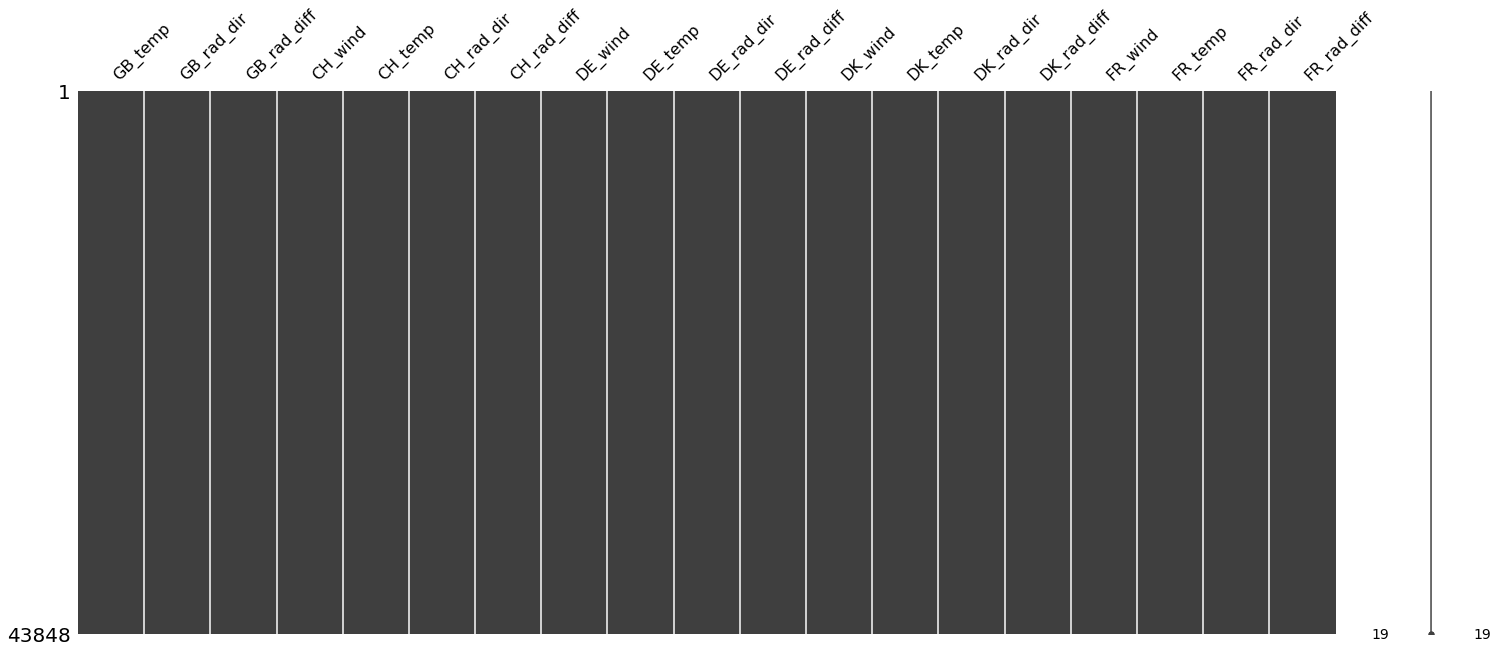

In [87]:
# create a missing data matrix
msno.matrix(df_weather_rel);

We have no missing data so we can just output the file as it is.

#### Saving the output

We save this data into the raw data folder.

In [88]:
# save the output
output_path = os.path.join(raw_data_path, "weather_data_raw.csv")
df_weather_rel.to_csv(output_path)